**Data Preprocessing**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
data = pd.read_csv("hate_speech.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
data.head()

,Unnamed: 0,text,label
0,0,Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .,1
1,1,"She may or may not be a Jew but she 's certainly stupid , she seems to think the Blacks wo n't kill her alongside every other White they can get their dirty hands on , what a muppet !",1
2,2,"I 've always considered teaching as one of the professions I would like to get into , but not in a neighbourhood like that ... never. kids like that disgust me .",1
3,3,And the sad thing is the white students at those schools will act like that too .,1
4,4,Their gods often had pale skin and blue eyes but I suppose literacy is n't valued highly by their cultural intelligencia .,1


In [ ]:
data.drop(columns = 'Unnamed: 0',inplace=True)

In [ ]:
data.head()

,text,label
0,Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .,1
1,"She may or may not be a Jew but she 's certainly stupid , she seems to think the Blacks wo n't kill her alongside every other White they can get their dirty hands on , what a muppet !",1
2,"I 've always considered teaching as one of the professions I would like to get into , but not in a neighbourhood like that ... never. kids like that disgust me .",1
3,And the sad thing is the white students at those schools will act like that too .,1
4,Their gods often had pale skin and blue eyes but I suppose literacy is n't valued highly by their cultural intelligencia .,1


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index(drop=True,inplace=True)

In [ ]:
data.head()

,text,label
0,Are you seeing a Doctor to get some medication against your high blood pressure ?,0
1,Ugh...,0
2,But maybe she was just mistaken .,0
3,Does anyone have that video of black gang attacking a white teenagers in front of his house and then a black gang of females attack his mother for trying to protect her son .,0
4,She gets cussed every day .,0


In [ ]:
data.tail()

,text,label
42807,i did a project on hitler for school and i read mein kampf and i got a lot of * * * * from the teachers and black kids but * * * * them im gonna read whut im gonna read wpww,0
42808,My Mind 's Eye - Small Faces - YouTube,0
42809,Asians are smart .,0
42810,"No I was asking for a link for were it says their banning the celtic cross , but thanks for the link i 'll check it out .",0
42811,I pray so too .,0


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


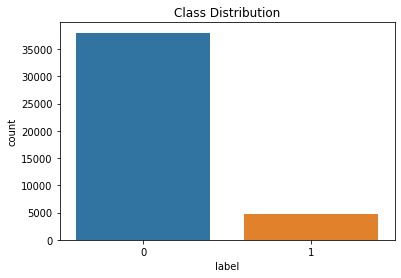

In [ ]:
y = data.label
fig1 = sns.countplot(y,label = 'count')
plt.title('Class Distribution')
plot = fig1.get_figure()

In [ ]:
data.groupby('label').count()[['text']]

,text
label,
0,38028
1,4784


In [ ]:
hate = data.where(data['label'] == 1)
hate = hate.dropna()

In [ ]:
not_hate = data.where(data['label'] == 0)
not_hate = not_hate.dropna()

In [ ]:
not_hate = not_hate[:4700]
hate = hate[:4700]

In [ ]:
mergedata = pd.concat([hate, not_hate])

In [ ]:
mergedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9400 entries, 9 to 5308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    9400 non-null   object 
 1   label   9400 non-null   float64
dtypes: float64(1), object(1)
memory usage: 220.3+ KB


In [ ]:
mergedata.groupby(['label']).count()[['text']]

,text
label,
0.0,4700
1.0,4700


In [ ]:
from sklearn.utils import shuffle
mergedata = shuffle(mergedata)
mergedata.reset_index(drop=True,inplace=True)

In [ ]:
mergedata.head()

,text,label
0,http://www.news4jax.com/news/26834699/detail.html#,0.0
1,I 'll be leaving for basic pretty soon .,0.0
2,We must do something .. and soon .,0.0
3,Why is Ca the melting pot of America it is so hard to fine people that have the same views on our white race as i have ?,0.0
4,"Fine with me as long as they do n't parade the city and demand `` gay rights '' ... keep it in the closed god damnit , homosexuality is n't exatly something to be proud of",1.0


In [ ]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))
    return df
mergedata = clean_text(mergedata, 'text')
mergedata.head()

,text,label
0,,0.0
1,i ll be leaving for basic pretty soon,0.0
2,we must do something and soon,0.0
3,why is ca the melting pot of america it is so hard to fine people that have the same views on our white race as i have,0.0
4,fine with me as long as they do n t parade the city and demand gay rights keep it in the closed god damnit homosexuality is n t exatly something to be proud of,1.0


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
mergedata['text'] = mergedata['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
mergedata.head()

,text,label
0,,0.0
1,leaving basic pretty soon,0.0
2,must something soon,0.0
3,ca melting pot america hard fine people views white race,0.0
4,fine long n parade city demand gay rights keep closed god damnit homosexuality n exatly something proud,1.0


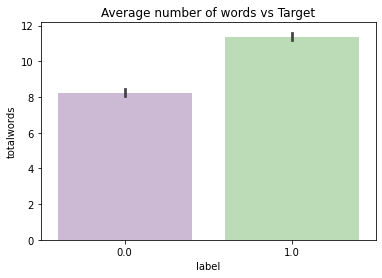

In [ ]:
mergedata['totalwords'] = mergedata['text'].str.split().str.len()
fig1 = sns.barplot('label','totalwords',data = mergedata,palette='PRGn')
plt.title('Average number of words vs Target')
plot = fig1.get_figure()
plot.savefig('Barplot.png')


# Basic NLP

In [ ]:
from collections import Counter

#count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word]+=1
    return count

In [ ]:
train_size = 700

train_sentences = mergedata.text[:train_size]
train_labels = mergedata['label'][:train_size]

test_sentences = mergedata.text[train_size:]
test_labels = mergedata['label'][train_size:]

In [ ]:
text = train_sentences
counter = counter_word(text)

In [ ]:
len(counter)

2822

In [ ]:
counter

Counter({'leaving': 1,
         'basic': 2,
         'pretty': 4,
         'soon': 13,
         'must': 8,
         'something': 9,
         'ca': 8,
         'melting': 1,
         'pot': 1,
         'america': 8,
         'hard': 7,
         'fine': 3,
         'people': 52,
         'views': 1,
         'white': 108,
         'race': 23,
         'long': 10,
         'n': 57,
         'parade': 2,
         'city': 3,
         'demand': 1,
         'gay': 4,
         'rights': 2,
         'keep': 4,
         'closed': 1,
         'god': 5,
         'damnit': 1,
         'homosexuality': 2,
         'exatly': 1,
         'proud': 3,
         'see': 40,
         'manialy': 1,
         'blood': 1,
         'honour': 2,
         'use': 16,
         'watching': 4,
         'television': 2,
         'spot': 1,
         'jew': 15,
         'like': 58,
         'wait': 8,
         'going': 20,
         'anti': 9,
         'euro': 3,
         '2012': 3,
         'shoe': 2,
         'bombers':

In [ ]:
num_words = len(counter)

#max number of words in a sequence
max_length = 50

train/test split

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(
    train_sequences,maxlen = max_length, padding = "post", truncating = "post")

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(
    test_sequences,maxlen = max_length, padding = "post", truncating = "post")

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index

{'white': 1,
 'like': 2,
 'n': 3,
 'people': 4,
 'would': 5,
 'black': 6,
 'whites': 7,
 'see': 8,
 'one': 9,
 'get': 10,
 'think': 11,
 'want': 12,
 'good': 13,
 'us': 14,
 'back': 15,
 'jews': 16,
 'way': 17,
 'race': 18,
 'blacks': 19,
 'take': 20,
 'never': 21,
 'going': 22,
 'time': 23,
 'non': 24,
 'go': 25,
 'make': 26,
 'day': 27,
 'say': 28,
 'last': 29,
 'country': 30,
 'use': 31,
 'hope': 32,
 'negro': 33,
 'live': 34,
 'know': 35,
 'jew': 36,
 'got': 37,
 'video': 38,
 'also': 39,
 'let': 40,
 'home': 41,
 'could': 42,
 'world': 43,
 'many': 44,
 'much': 45,
 'every': 46,
 'around': 47,
 'women': 48,
 'new': 49,
 'show': 50,
 'soon': 51,
 'always': 52,
 'youtube': 53,
 'africa': 54,
 'hate': 55,
 'look': 56,
 'children': 57,
 'man': 58,
 'well': 59,
 'right': 60,
 'woman': 61,
 'place': 62,
 'ever': 63,
 'first': 64,
 'sure': 65,
 'even': 66,
 'little': 67,
 'two': 68,
 'post': 69,
 'thing': 70,
 'racist': 71,
 'looking': 72,
 'long': 73,
 'need': 74,
 'better': 75,
 'anyth

In [ ]:
train_padded.shape

(700, 50)

In [ ]:
test_padded.shape

(8700, 50)

In [ ]:
print(mergedata.text[0])
print(train_sequences[1])
print(train_padded[1])


[1118, 610, 289, 51]
[1118  610  289   51    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


# check inverse

In [ ]:
reverse_word_index = dict([value,key] for (key,value) in word_index.items())

In [ ]:
def decode(text):
    return " ".join([reverse_word_index.get(i,"?") for i in text])

In [ ]:
decode(train_sequences[0])

''

In [ ]:
train_padded.shape


(700, 50)

In [ ]:
test_padded.shape

(8700, 50)

## **Bidirectional_RNN model**




In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

model = Sequential()

model.add(Embedding(num_words, 128, input_length = max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1,activation = "sigmoid"))

optimizer = Adam(learning_rate = 3e-4)

model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 128)           361216    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 460,161
Trainable params: 460,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
batch_size = 32

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(train_padded, train_labels, batch_size=batch_size, epochs=10, verbose=1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_split=2/7,)

Epoch 1/10
16/16 [==============================] - 2s 130ms/step - loss: 0.6906 - accuracy: 0.5180 - val_loss: 0.6877 - val_accuracy: 0.5100
Epoch 2/10
16/16 [==============================] - 1s 69ms/step - loss: 0.6792 - accuracy: 0.5180 - val_loss: 0.6788 - val_accuracy: 0.5100
Epoch 3/10
16/16 [==============================] - 1s 71ms/step - loss: 0.6599 - accuracy: 0.6040 - val_loss: 0.6644 - val_accuracy: 0.5550
Epoch 4/10
16/16 [==============================] - 1s 70ms/step - loss: 0.6266 - accuracy: 0.6960 - val_loss: 0.6415 - val_accuracy: 0.6000
Epoch 5/10
16/16 [==============================] - 1s 70ms/step - loss: 0.5791 - accuracy: 0.6960 - val_loss: 0.6236 - val_accuracy: 0.6550
Epoch 6/10
16/16 [==============================] - 1s 69ms/step - loss: 0.5300 - accuracy: 0.7480 - val_loss: 0.6107 - val_accuracy: 0.6500
Epoch 7/10
16/16 [==============================] - 1s 68ms/step - loss: 0.4713 - accuracy: 0.7880 - val_loss: 0.6134 - val_accuracy: 0.6500
Epoch 8/10
1

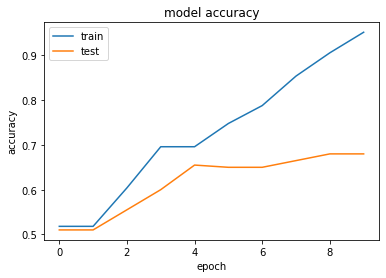

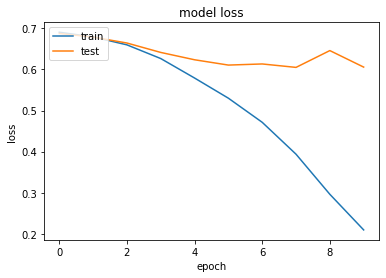

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_tweet_predict = (model.predict(test_padded) > 0.5).astype('int32')

In [ ]:
from sklearn.metrics import classification_report
target_names =  ['class 0', 'class 1']
print(classification_report(test_labels, y_tweet_predict , target_names=target_names, digits = 4))

              precision    recall  f1-score   support

     class 0     0.6283    0.8509    0.7229      4339
     class 1     0.7709    0.4992    0.6060      4361

    accuracy                         0.6746      8700
   macro avg     0.6996    0.6750    0.6644      8700
weighted avg     0.6998    0.6746    0.6643      8700

